In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy
import skimage

In [2]:
def plot_power_spectrum(fft_img):
    power_spec = np.abs(fft_img) ** 2
    plt.imshow(np.log(1 + power_spec), cmap='gray')
    plt.axis('off')
    plt.show()

def shift_fft(img):
    img_fft = scipy.fft.fft2(img)
    img_shift = scipy.fft.fftshift(img_fft)
    return img_shift

def inv_fft(fft):
    inv_shift = scipy.fft.ifftshift(fft)
    inv_img = scipy.fft.ifft2(inv_shift)
    return np.real(inv_img)

## 2.1

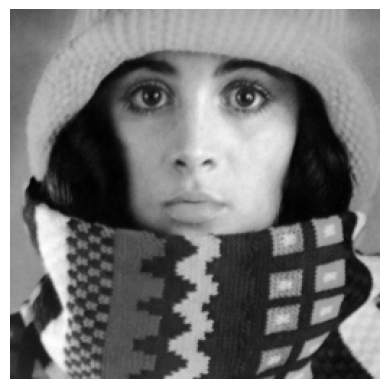

In [3]:
IMG = skimage.io.imread('trui.png')

plt.imshow(IMG, cmap='gray')
plt.axis('off')
plt.show()

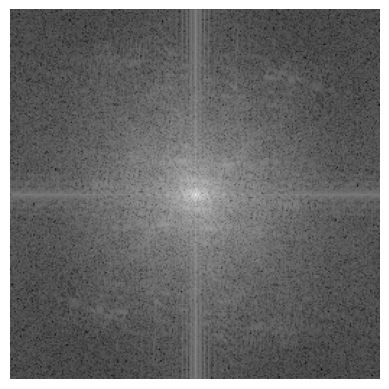

In [4]:
img_power_spectrum = shift_fft(IMG)
plot_power_spectrum(img_power_spectrum)

## 2.2

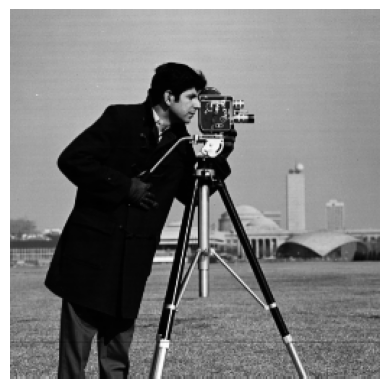

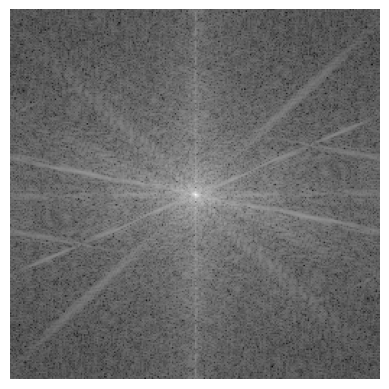

In [5]:
IMG = skimage.io.imread('cameraman.tif')

plt.imshow(IMG, cmap='gray')
plt.axis('off')
plt.show()

img_fft = shift_fft(IMG)
plot_power_spectrum(img_fft)

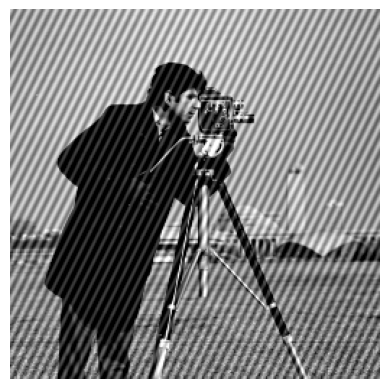

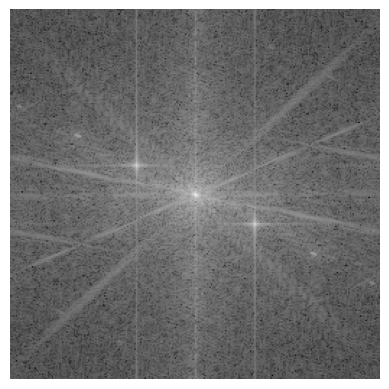

In [6]:
a0 = 50
v0 = 1
w0 = 0.5

# apply 10 * cos(v0x + w0y) to the image
x = np.arange(IMG.shape[1])
y = np.arange(IMG.shape[0])
X, Y = np.meshgrid(x, y)
IMG_mod = IMG + a0 * np.cos(v0 * X + w0 * Y)
IMG_mod = np.clip(IMG_mod, 0, 255).astype(np.uint8)
plt.imshow(IMG_mod, cmap='gray')
plt.axis('off')
plt.show()

IMG_mod_fft = shift_fft(IMG_mod)
plot_power_spectrum(IMG_mod_fft)

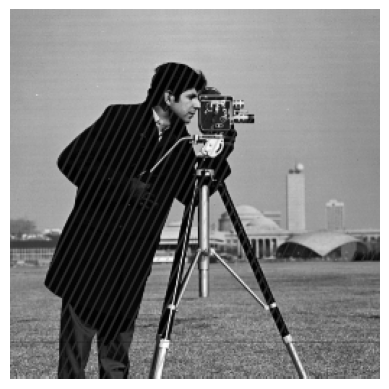

In [7]:
IMG_reconstructed_naive = IMG_mod - a0 * np.cos(v0 * X + w0 * Y)
IMG_reconstructed_naive = np.clip(IMG_reconstructed_naive, 0, 255).astype(np.uint8)
plt.imshow(IMG_reconstructed_naive, cmap='gray')
plt.axis('off')
plt.show()

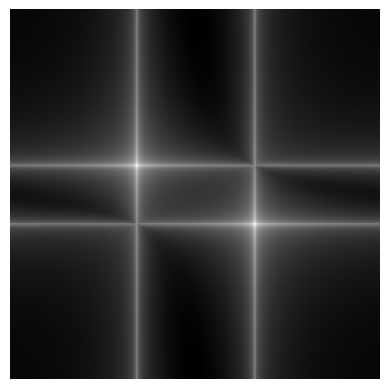

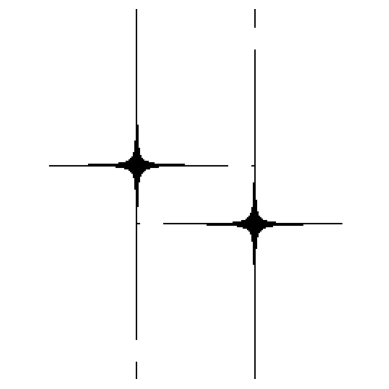

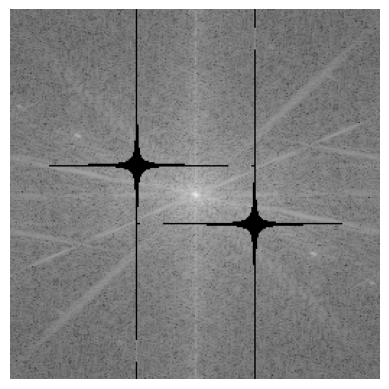

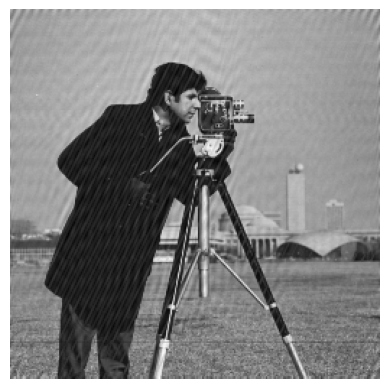

In [8]:
img_filter_fft = shift_fft(a0 * np.cos(v0 * X + w0 * Y))
plot_power_spectrum(img_filter_fft)

# get 80th percentile of the power spectrum of the filter
filter_power_spec = np.abs(img_filter_fft) ** 2
threshold = np.percentile(filter_power_spec, 98)
img_filter_fft_thresholded = np.where(filter_power_spec >= threshold, 0, 1)
plot_power_spectrum(img_filter_fft_thresholded)

img_recon = IMG_mod_fft * img_filter_fft_thresholded
plot_power_spectrum(img_recon)

plt.imshow(inv_fft(img_recon), cmap='gray')
plt.axis('off')
plt.show()

# 2.3

In [ ]:
asdf